In [53]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm
import energyflow as ef #needed for the Geant4 datasets

In [54]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
import tensorflow.keras.backend as K

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ['CUDA_VISIBLE_DEVICES']="3"
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=24220)]) #in MB


# Datasets

In [55]:
N = 100000
mu = 0
test_mu = 2
sigma = 1
epsilon_sim = 1
epsilon_data = 2

data_color = "blue"
sim_color = "red"

#sim
gauss_truth_prior_C = np.random.normal(mu,sigma,N)
gauss_reco_prior_C = np.random.normal(gauss_truth_prior_C,epsilon_sim,N)

#data
gauss_truth_prior_D = np.random.normal(mu,sigma,N)
gauss_reco_prior_D = np.random.normal(gauss_truth_prior_D,epsilon_data,N)


# ### test set


#sim2
gauss_truth_prior_C2 = np.random.normal(test_mu,sigma,N)
gauss_reco_prior_C2 = np.random.normal(gauss_truth_prior_C2,epsilon_sim,N)

#data2
gauss_truth_prior_D2 = np.random.normal(test_mu,sigma,N)
gauss_reco_prior_D2 = np.random.normal(gauss_truth_prior_D2,epsilon_data,N)



# Plot

In [56]:

# Not sure what this is?
x0_x = np.sort(gauss_reco_prior_C)
x0_ecdf = np.arange(len(np.sort(x0_x)))/float(len(x0_x))

x1_x = np.sort(gauss_reco_prior_D)
x1_ecdf = np.arange(len(np.sort(x1_x)))/float(len(x1_x))



def my_test_calib(x):
    firstpart = np.interp(x,x0_x,x0_ecdf)
    return np.interp(firstpart,x1_ecdf,x1_x)

x0_x2 = np.sort(gauss_reco_prior_C2)
x0_ecdf2 = np.arange(len(np.sort(x0_x2)))/float(len(x0_x2))

x1_x2 = np.sort(gauss_reco_prior_D2)
x1_ecdf2 = np.arange(len(np.sort(x1_x2)))/float(len(x1_x2))

def my_test_calib2(x):
    firstpart = np.interp(x,x0_x2,x0_ecdf2)
    return np.interp(firstpart,x1_ecdf2,x1_x2)

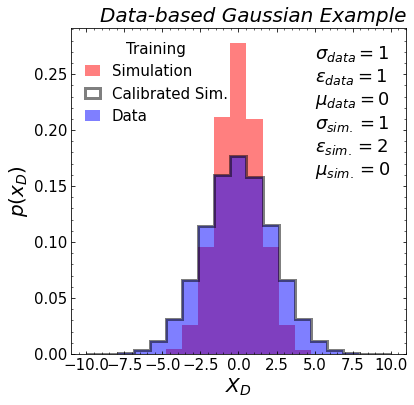

In [57]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax0.minorticks_on()

_=plt.hist(gauss_reco_prior_C,bins=np.linspace(-10,10,20),alpha=0.5,label="Simulation", density= True, color = sim_color)
_=plt.hist(my_test_calib(gauss_reco_prior_C),bins=np.linspace(-10,10,20),alpha=0.5,histtype="step",color="black",label="Calibrated Sim.", density= True, lw = 3)
_=plt.hist(gauss_reco_prior_D,bins=np.linspace(-10,10,20),alpha=0.5,label="Data", density= True, color = data_color)
plt.legend(frameon=False)

plt.xlabel("$X_D$",fontsize=20)
plt.ylabel("$p(x_D)$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1,handlelength=1, loc = "upper left", title = "Training", title_fontsize = 15)
_=plt.title("Data-based Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(5,0.16,r"$\sigma_{data}=1$" "\n" r"$\epsilon_{data}=1$" "\n" r"$\mu_{data}=0$" "\n" r"$\sigma_{sim.}=1$" "\n" r"$\epsilon_{sim.}=2$" "\n" r"$\mu_{sim.}=0$",fontsize=18)
plt.savefig("Gaussian_prior_OT.pdf",bbox_inches='tight')

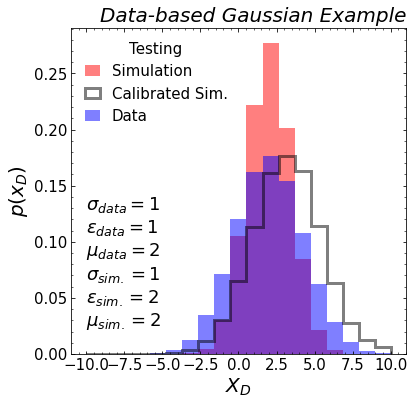

In [66]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax0.minorticks_on()

_=plt.hist(gauss_reco_prior_C2,bins=np.linspace(-10,10,20),alpha=0.5,label="Simulation", density= True, color = sim_color)
_=plt.hist(my_test_calib(gauss_reco_prior_C2),bins=np.linspace(-10,10,20),alpha=0.5,histtype="step",color="black",label="Calibrated Sim.", density= True, lw = 3)
_=plt.hist(gauss_reco_prior_D2,bins=np.linspace(-10,10,20),alpha=0.5,label="Data", density= True, color = data_color)
plt.legend(frameon=False)

plt.xlabel("$X_D$",fontsize=20)
plt.ylabel("$p(x_D)$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1,handlelength=1, loc = "upper left", title = "Testing", title_fontsize = 15)
_=plt.title("Data-based Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-10,0.025,r"$\sigma_{data}=1$" "\n" r"$\epsilon_{data}=1$" "\n" r"$\mu_{data}=2$" "\n" r"$\sigma_{sim.}=1$" "\n" r"$\epsilon_{sim.}=2$" "\n" r"$\mu_{sim.}=2$",fontsize=18)
plt.savefig("Gaussian_prior_OT2.pdf",bbox_inches='tight')

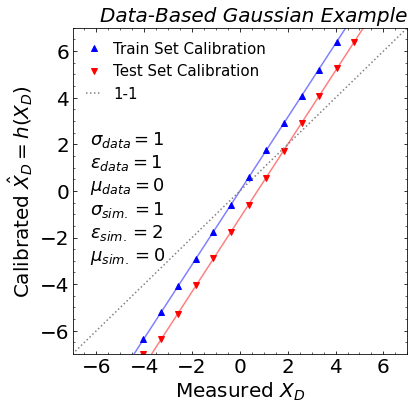

In [65]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
plt.subplots_adjust(hspace = .001)

ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

xx = np.linspace(-7,7,20)
plt.plot(xx,my_test_calib(xx),color="blue",marker='^',ls="",label="Train Set Calibration")
plt.plot(xx,my_test_calib2(xx),color="red",marker='v',ls="",label="Test Set Calibration")

alpha = np.sqrt(1**2+2**2)/np.sqrt(1**2+1**2)
plt.plot(xx,alpha*xx,color="blue",alpha=0.5)

alpha2 = np.sqrt(1**2+2**2)/np.sqrt(1**2+1**2)
plt.plot(xx,alpha2*xx+2*(1-alpha2),color="red",alpha=0.5)

plt.plot(xx,xx,ls=":",color="gray",label="1-1")
plt.xlim([xx[0],xx[-1]])
plt.ylim([xx[0],xx[-1]])

plt.xlabel("Measured $X_D$",fontsize=20)
plt.ylabel("Calibrated $\hat{X}_D = h(X_D)$",fontsize=20)
plt.legend(frameon=False,fontsize=15,ncol=1,handlelength=1)
_=plt.title("Data-Based Gaussian Example",loc="right",fontsize=20, fontstyle="italic")
_=plt.text(-6.25,-3.0,r"$\sigma_{data}=1$" "\n" r"$\epsilon_{data}=1$" "\n" r"$\mu_{data}=0$" "\n" r"$\sigma_{sim.}=1$" "\n" r"$\epsilon_{sim.}=2$" "\n" r"$\mu_{sim.}=0$",fontsize=18)
plt.savefig("Gaussian_prior_OT3.pdf",bbox_inches='tight')